# **Cat vs. Dog Image Classifier**

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Data Augumentation**

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [3]:
training_path="/content/drive/MyDrive/Cata_and_Dog_Classsification/train"
testing_path="/content/drive/MyDrive/Cata_and_Dog_Classsification/test"

In [4]:
train=train_datagen.flow_from_directory(training_path,
                                      target_size=(150,150),
                                      batch_size=20,
                                      class_mode='binary',
                                      subset='training')
test=train_datagen.flow_from_directory(testing_path,
                                      target_size=(150,150),
                                      batch_size=20,
                                      class_mode='binary',
                                      subset='training')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


## **Making CNN Model**

In [5]:
from tensorflow.keras import layers, models


In [6]:
model = models.Sequential([
    # Convolutional layers with ReLU activation and MaxPooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten the output and feed it into Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## **Model Summary**

In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

## **Training**

In [9]:
history = model.fit(
    train,
    steps_per_epoch=10,
    epochs=10,
    validation_data=test,
    validation_steps=50
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 151s 11s/step - accuracy: 0.5076 - loss: 0.7200 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/10
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6000 - loss: 0.6852

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5186 - loss: 0.6924 - val_accuracy: 0.5214 - val_loss: 0.6901
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.5498 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5735 - loss: 0.6905 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 866ms/step - accuracy: 0.4740 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.4736 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 658ms/step - accuracy: 0.5127 - loss: 0.6928 - val_accuracy: 0.5071 - val_loss: 0.6931
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 665ms/step - accuracy: 0.5384 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 0.4435 - loss: 0.6988 - val_accuracy: 0.4786 - val_loss

In [10]:
val_loss, val_accuracy = model.evaluate(test)
print(f"Validation accuracy: {val_accuracy:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.4726 - loss: 0.7627
Validation accuracy: 0.50


# **Visualization**

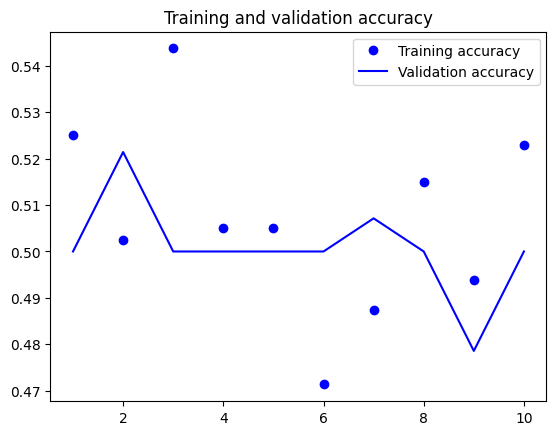

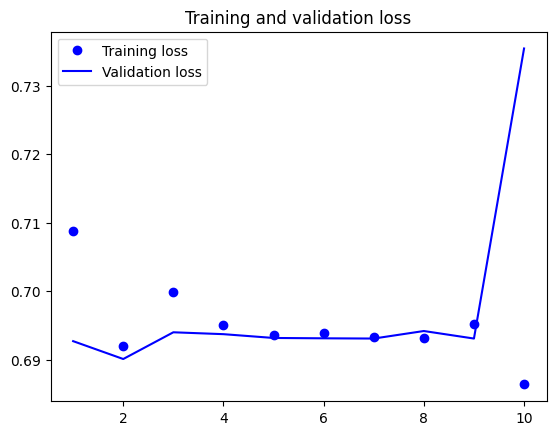

In [11]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
validation = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plotting accuracy
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, validation, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plotting loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# **Making Prediction**

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an image for prediction
img_path = '/content/drive/MyDrive/Cata_and_Dog_Classsification/train/dogs/dog_103.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
It's a dog!
